## Traditional Models for Usefulness of Reviews Prediction:


1.   Sklearn implementaion for KNN
2.   Sklearn implementaion for RANDOM FOREST
3.   Evaluation for both algorithms using GridSearchCV



In [0]:
#Model Imports
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import sklearn

from matplotlib import pyplot as plt
from scipy.stats import norm, skew
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import neural_network
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import datetime
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import confusion_matrix
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score

In [0]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
reviews_data_train = pd.read_csv('/content/drive/My Drive/Task2_Search/TrainTestFiles/reviews_data_train.csv')
reviews_data_test = pd.read_csv('/content/drive/My Drive/Task2_Search/TrainTestFiles/reviews_data_test.csv')

In [0]:
reviews_data_train.head(5)

,review_id,cleaned_text_final,user_rating_of_business,class_useful,business_review_count,business_rating,category_vector,Restaurants,Food,American (Traditional),Nightlife,Bars,Sandwiches,Fast Food,American (New),Pizza,Mexican,Burgers,Breakfast & Brunch,Italian,Chinese,Coffee & Tea,Salad,Event Planning & Services,Chicken Wings,Seafood,Sports Bars,Delis,Cafes,Japanese,Caterers,Steakhouses,Sushi Bars,Bakeries,Asian Fusion,Barbeque,Specialty Food,Desserts,Diners,Beer,Wine & Spirits,Mediterranean,Pubs,Arts & Entertainment,Thai,Buffets,Wine Bars,Ice Cream & Frozen Yogurt,Vegetarian,Greek,Tex-Mex,Cocktail Bars,Juice Bars & Smoothies,Lounges,Soup,Gluten-Free,Hot Dogs,Food Delivery Services,Indian,Vegan,Southern,Ethnic Food,Comfort Food,Middle Eastern,Vietnamese,Grocery,Bagels,Venues & Event Spaces,Latin American,Hotels & Travel,Shopping,Food Trucks,Korean,Music Venues,Gastropubs,Local Flavor,Chicken Shop,French,Hotels,Tapas/Small Plates,Beer Bar,Hawaiian,Active Life,Soul Food,Dive Bars,Noodles,Donuts,Food Stands,Breweries,Cajun/Creole,Casinos,Cheesesteaks,Caribbean,Tapas Bars,Karaoke,Street Vendors,Pakistani,Halal,Irish,Tacos,Dance Clubs,Fish & Chips,Filipino,Party & Event Planning,Spanish,Meat Shops,Convenience Stores,average_stars,user_review_count,useful_votes_user,fans
0,N2gp3mfhdO9f24X8asEtdA,order pork grinder favorite bone chunks fat gu...,1.0,0,630,4.0,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.00,2,1,0
1,HOuf_liDHJ97Kx1HnDbJ-Q,Every walk restaurant immediately feel home Yo...,4.0,0,253,4.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.94,33,33,0
2,mizfLpOErvLapK21q-w4nA,Great food Waiter awesome great view fountains...,5.0,0,1783,4.0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.70,20,16,0
3,2jURlxgOi7ToO_rdvVrYKg,Every drink That selling point Pei Wei airport...,3.0,1,264,2.5,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.53,1886,5868,197
4,I2A9KstZYQfGfFbECTk_hw,OK avoid toro rough flavor tasted little like ...,4.0,1,263,3.5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.80,353,637,30


In [0]:
# defining x and y:
reviews_data_x_train = reviews_data_train.drop(["class_useful",'review_id','cleaned_text_final','category_vector'],axis=1)
reviews_data_y_train = reviews_data_train["class_useful"]
reviews_data_x_test = reviews_data_test.drop(["class_useful",'review_id','cleaned_text_final','category_vector'],axis=1)
reviews_data_y_test = reviews_data_test["class_useful"]

In [0]:
print(reviews_data_x_train.shape,reviews_data_x_test.shape)

(267764, 107) (131885, 107)


In [0]:
print(reviews_data_y_train.shape,reviews_data_y_test.shape)

(267764,) (131885,)


In [0]:
#Hyper Parameter Tuning - KNN
k_range = range(5,15,3)
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
param_grid = dict(n_neighbors = k_range)
grid = GridSearchCV(model, param_grid, cv = 5, scoring = 'roc_auc')
grid.fit(reviews_data_x_train,reviews_data_y_train)
print(max(grid.cv_results_['mean_test_score']))

0.7306350794060031


In [0]:
grid.best_params_

{'n_neighbors': 14}

In [0]:
final_model = KNeighborsClassifier(n_neighbors = 14)
final_model.fit(reviews_data_x_train, reviews_data_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

In [0]:
pred_vals = final_model.predict(reviews_data_x_test)

In [0]:
roc_auc_score(reviews_data_y_test, pred_vals)

0.664301927342831

In [0]:
#Hyper Parameter Tuning - Random Forest
model = RandomForestClassifier()
param_grid = {'n_estimators':[50,100,150],
              'criterion':['gini','entropy'],
              'max_depth':[5,10,15],
              'max_features':['sqrt']}
grid = GridSearchCV(model, param_grid, cv = 5, scoring = 'roc_auc')
grid.fit(reviews_data_x_train,reviews_data_y_train)
print(max(grid.cv_results_['mean_test_score']))


0.750796854991982


In [0]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'sqrt',
 'n_estimators': 150}

In [0]:
final_model = RandomForestClassifier(criterion = 'gini',max_depth = 15, max_features = 'sqrt', n_estimators = 150)
final_model.fit(reviews_data_x_train, reviews_data_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
pred_vals = final_model.predict(reviews_data_x_test)
roc_auc_score(reviews_data_y_test, pred_vals)

0.6779639712015388

Text(0.5, 0, 'Relative Importance')

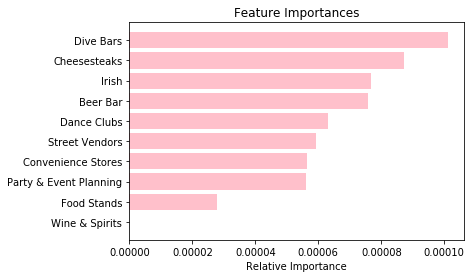

In [0]:
#Feature Importance
features=reviews_data_x_train.columns
importances = final_model.feature_importances_
indices = np.argsort(importances)
indices_top_10 = indices[:10]
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices_top_10)), importances[indices_top_10], color='pink', align='center')
plt.yticks(range(len(indices_top_10)), features[indices_top_10])
plt.xlabel('Relative Importance')